In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [37]:
data_dir = {

    "BATTERY_DIR" : "data/battery",
    "BIOLOGICAL_DIR" : "data/biological",
    "CLOTHES_DIR" : "data/clothes",
    "GLASS_DIR" : "data/glass",
    "METAL_DIR" : "data/metal",
    "PAPER_DIR" : "data/paper",
    "PLASTIC_DIR" : "data/plastic",
    "SHOES_DIR" : "data/shoes",
    "TRASH_DIR" : "data/trash" 
}



In [106]:
train_directories = {
    "TRAIN_BATTERY_DIR" : "dev/train/battery",
    "TRAIN_BIOLOGICAL_DIR" : "dev/train/biological",
    "TRAIN_CARDBOARD_DIR" : "dev/train/cardboard",
    "TRAIN_CLOTHES_DIR" : "dev/train/clothes",
    "TRAIN_GLASS_DIR" : "dev/train/glass",
    "TRAIN_METAL_DIR" : "dev/train/metal",
    "TRAIN_PAPER_DIR" : "dev/train/paper",
    "TRAIN_PLASTIC_DIR" : "dev/train/plastic",
    "TRAIN_SHOES_DIR" : "dev/train/shoes",
    "TRAIN_TRASH_DIR" : "dev/train/trash",
}

validation_directories = {
    "VALIDATION_BATTERY_DIR" : "dev/validation/battery",
    "VALIDATION_BIOLOGICAL_DIR" : "dev/validation/biological",
    "VALIDATION_CARDBOARD_DIR" : "dev/validation/cardboard",
    "VALIDATION_CLOTHES_DIR" : "dev/validation/clothes",
    "VALIDATION_GLASS_DIR" : "dev/validation/glass",
    "VALIDATION_METAL_DIR" : "dev/validation/metal",
    "VALIDATION_PAPER_DIR" : "dev/validation/paper",
    "VALIDATION_PLASTIC_DIR" : "dev/validation/plastic",
    "VALIDATION_SHOES_DIR" : "dev/validation/shoes",
    "VALIDATION_TRASH_DIR" : "dev/validation/trash"
}

In [32]:
#os.makedirs("../data/selam" )
for dir in train_directories.values():
    os.makedirs("../"+dir)

for dir in validation_directories.values():
    os.makedirs("../"+dir)

In [68]:
all_files = []


for dir in data_dir.values():
    for file in os.listdir("../"+dir):
        all_files.append(file)
    

print(all_files)


['battery_932.jpg', 'battery_926.jpg', 'battery_715.jpg', 'battery_701.jpg', 'battery_729.jpg', 'battery_517.jpg', 'battery_271.jpg', 'battery_265.jpg', 'battery_503.jpg', 'battery_259.jpg', 'battery_99.jpg', 'battery_488.jpg', 'battery_463.jpg', 'battery_305.jpg', 'battery_311.jpg', 'battery_477.jpg', 'battery_66.jpg', 'battery_339.jpg', 'battery_72.jpg', 'battery_846.jpg', 'battery_852.jpg', 'battery_107.jpg', 'battery_661.jpg', 'battery_675.jpg', 'battery_113.jpg', 'battery_885.jpg', 'battery_649.jpg', 'battery_891.jpg', 'battery_890.jpg', 'battery_648.jpg', 'battery_884.jpg', 'battery_674.jpg', 'battery_112.jpg', 'battery_106.jpg', 'battery_660.jpg', 'battery_853.jpg', 'battery_847.jpg', 'battery_73.jpg', 'battery_67.jpg', 'battery_338.jpg', 'battery_310.jpg', 'battery_476.jpg', 'battery_462.jpg', 'battery_304.jpg', 'battery_489.jpg', 'battery_98.jpg', 'battery_258.jpg', 'battery_264.jpg', 'battery_502.jpg', 'battery_516.jpg', 'battery_270.jpg', 'battery_728.jpg', 'battery_700.jpg'

In [69]:
len(all_files)

21301

In [70]:
train_files, validation_files = train_test_split(all_files, test_size=0.2, random_state=42)

In [71]:
print(len(train_files))
print(len(validation_files))

17040
4261


In [72]:
data_dir.items()


dict_items([('data/battery', 'data/battery'), ('data/biological', 'data/biological'), ('data/clothes', 'data/clothes'), ('data/glass', 'data/glass'), ('data/metal', 'data/metal'), ('data/paper', 'data/paper'), ('data/plastic', 'data/plastic'), ('data/shoes', 'data/shoes'), ('data/trash', 'data/trash')])

In [107]:



for category, dir in data_dir.items():

    all_files = [os.path.join("../", dir, file) for file in os.listdir("../" + dir)]


    train_files, validation_files = train_test_split(all_files, test_size=0.2, random_state=42)

    
    train_dir = train_directories["TRAIN_" + category.upper().split("/")[1] + "_DIR"]

    for file in train_files:

        shutil.move(file, "../"+train_dir)


    validation_dir = validation_directories["VALIDATION_" + category.upper().split("/")[1] + "_DIR"]


    for file in validation_files:
        shutil.move(file, "../"+validation_dir)

    

945
756
TRAIN_BATTERY_DIR
dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/train/battery
../dev/trai

In [123]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [124]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Input, concatenate, MaxPooling2D

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [125]:
train_dir = "dev/train"
validation_dir = "dev/validation"


In [126]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1/255)

In [127]:
train_generator = train_datagen.flow_from_directory(
    "../" + train_dir,
    target_size=(400,400),
    batch_size=16,
    class_mode="categorical"
)

validation_generator =validation_datagen.flow_from_directory(
    "../" + validation_dir,
    target_size=(400,400),
    batch_size=16,
    class_mode="categorical"
)

Found 18910 images belonging to 10 classes.
Found 4732 images belonging to 10 classes.


In [128]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4052-7BEF

 Directory of c:\Users\90553\Documents\GitHub\object_detection\model

14/07/2024  10:47    <DIR>          .
14/07/2024  11:09    <DIR>          ..
14/07/2024  17:49        14,826,189 best_model.keras
14/07/2024  10:22    <DIR>          dev
14/07/2024  08:03       228,359,707 EcoSort.keras
14/07/2024  09:38         1,435,124 file_management.ipynb
               3 File(s)    244,621,020 bytes
               3 Dir(s)  170,643,644,416 bytes free


In [129]:

"""files_in_cardboard = [os.path.join("../data/cardboard/" + file) for file in os.listdir("../data/cardboard")]

train_files_cardboard, validation_files_cardboard = train_test_split(files_in_cardboard, test_size=0.2, random_state=42)

cardboard_train = os.makedirs("../dev/train/cardboard", exist_ok=True)
cardboard_validation = os.makedirs("../dev/validation/cardboard", exist_ok=True)

train_dir_cardboard = "../dev/train/cardboard"
validation_dir_cardboard = "../dev/validation/cardboard"

for file in train_files_cardboard:
        shutil.move(file, train_dir_cardboard)

for file in validation_files_cardboard:
        shutil.move(file, validation_dir_cardboard)"""


'files_in_cardboard = [os.path.join("../data/cardboard/" + file) for file in os.listdir("../data/cardboard")]\n\ntrain_files_cardboard, validation_files_cardboard = train_test_split(files_in_cardboard, test_size=0.2, random_state=42)\n\ncardboard_train = os.makedirs("../dev/train/cardboard", exist_ok=True)\ncardboard_validation = os.makedirs("../dev/validation/cardboard", exist_ok=True)\n\ntrain_dir_cardboard = "../dev/train/cardboard"\nvalidation_dir_cardboard = "../dev/validation/cardboard"\n\nfor file in train_files_cardboard:\n        shutil.move(file, train_dir_cardboard)\n\nfor file in validation_files_cardboard:\n        shutil.move(file, validation_dir_cardboard)'

In [130]:
import keras

In [149]:
from tensorboardX import SummaryWriter

train_writer = SummaryWriter('../logs/train')
validation_writer = SummaryWriter('../logs/validation')

def log_to_tensorboard(epoch, logs):
    train_writer.add_scalar('loss', logs['loss'], epoch)
    train_writer.add_scalar('accuracy', logs['accuracy'], epoch)
    
    val_loss = logs.get('val_loss', None)
    val_accuracy = logs.get('val_accuracy', None)
    
    if val_loss is not None:
        validation_writer.add_scalar('val_loss', val_loss, epoch)
    if val_accuracy is not None:
        validation_writer.add_scalar('val_accuracy', val_accuracy, epoch)

callback_list = [
    keras.callbacks.EarlyStopping(patience=3, monitor="val_loss", mode="min", verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2, verbose=1, min_lr=0.00001),
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras", monitor="val_loss", save_best_only=True, verbose=1),
    keras.callbacks.LambdaCallback(on_epoch_end=log_to_tensorboard),
    tf.keras.callbacks.TensorBoard(log_dir='../logs')  
]



In [150]:
from tensorflow.keras.applications import VGG16, VGG19, Xception, InceptionV3
from tensorflow.keras.regularizers import l1, l2

base_model = tf.keras.applications.mobilenet.MobileNet(include_top=False,
                                                   weights='imagenet', 
                                                   input_shape=(400, 400, 3))

C:\Users\90553\AppData\Local\Temp\ipykernel_21716\235083783.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.mobilenet.MobileNet(include_top=False,


In [151]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip("horizontal"),
                                         tf.keras.layers.RandomRotation(0.2), 
                                         tf.keras.layers.RandomZoom(0.2),
                                         tf.keras.layers.RandomHeight(0.2),
                                         tf.keras.layers.RandomWidth(0.2),],
                                         name ="data_augmentation")

In [152]:

name="MobileNet"

model = tf.keras.Sequential([tf.keras.Input(shape=(400, 400, 3), name="input_layer"),
                    data_augmentation,
                    base_model,
                    tf.keras.layers.GlobalAveragePooling2D(),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(10, activation='softmax')
                    ], name=name)


model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="categorical_crossentropy", metrics=["accuracy"])



In [153]:
model.summary()

Model: "MobileNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, None, None,     │     3,228,864 │
│                                 │ 1024)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_16     │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,361,354 (12.82 MB)

 Trainable params: 3,339,466 (12.74 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [154]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=callback_list,
    batch_size=16
)


Epoch 1/20
  11/1182 ━━━━━━━━━━━━━━━━━━━━ 1:19:31 4s/step - accuracy: 0.2879 - loss: 2.3285

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,813,270 (216.73 MB)

 Trainable params: 28,389,418 (108.30 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 28,389,420 (108.30 MB)

In [16]:

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]


In [17]:
plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

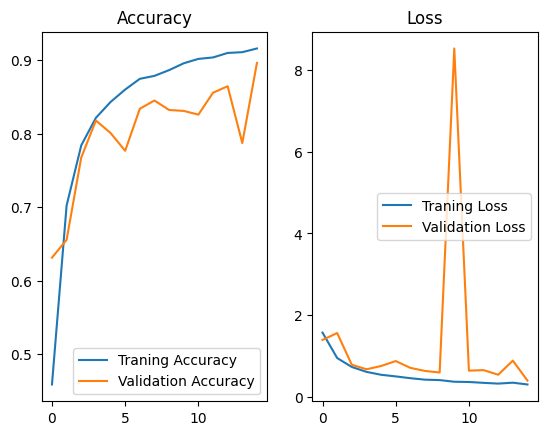

In [18]:
epochs = range(len(history.history['accuracy']))

plt.subplot(1,2,1)
plt.plot(epochs, acc, label="Traning Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, label="Traning Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Loss")
plt.legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

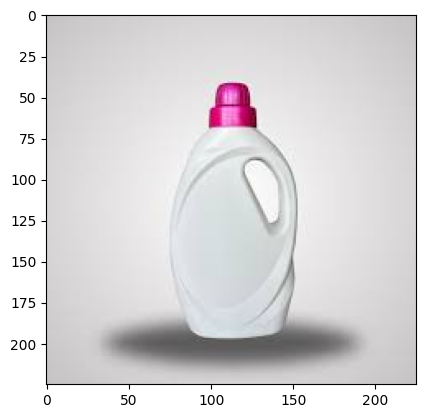

In [22]:
import numpy as np
from PIL import Image


im = Image.open("../download.jpg")
plt.imshow(im)
im = im.resize((224,224))
im_array = np.array(im)
im_array = np.expand_dims(im_array, axis = 0)
pred = model.predict(im_array)
pred

In [48]:
print(len(os.listdir("../dev/train/cardboard")))
print(len(os.listdir("../dev/validation/cardboard")))

NameError: name 'os' is not defined

In [25]:
!nvidia-smi

Sun Jul 14 09:27:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   58C    P0              16W /  50W |    561MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--